In [409]:
from pathlib import Path
from data_processing import read_data, with_big_monthly_sessions, collect_sessions_data
from graphics import plot_session_graphic, draw, calculate_clusters

DATA_FILE = Path.cwd() / 'data' / 'trade_info.sqlite3'

Данные считываются, времена и даты приводятся в удобный формат и выфильтровываются только ежемесячные торги с минимум 20 событиями

In [410]:
df = read_data(DATA_FILE)
df_filtered = with_big_monthly_sessions(df)

Для каждой сессии час, в который она прошла, нарезается на интервалы по 5 минут, внутри каждого интервала берётся средневзвешенное значение цены, таким образом для каждой сессии получается вектор одинаковой цены:

In [411]:
DELTA = 2
data = collect_sessions_data(df_filtered, minutes_delta=DELTA)

Пример для 2 сессий:

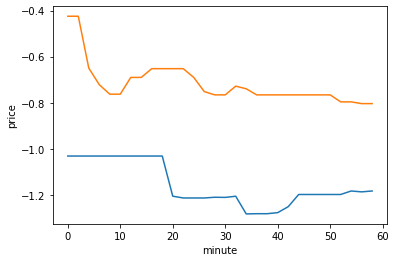

In [412]:
plot_session_graphic(data, 40, minutes_delta=DELTA)
plot_session_graphic(data, 98, minutes_delta=DELTA)

Если отнормировать, станет получше:

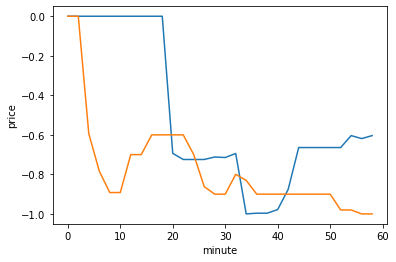

In [413]:
plot_session_graphic(data, 40, normalize=True, minutes_delta=DELTA)
plot_session_graphic(data, 98, normalize=True, minutes_delta=DELTA)

Каждая сессия будет отмеченна на графике следующим образом:
Угол - это месяц (по часовой стрелке - сверху январь, направо идут февраль, март и т.д.)
Расстояние - это год, плюс сессии в одно и то же время, но на разных платформах отмечаются рядом

Теперь можно строить графики с кластерами (за которые отвечают цвета точек). Серый цвет точки - это шум:

There are 5 clusters


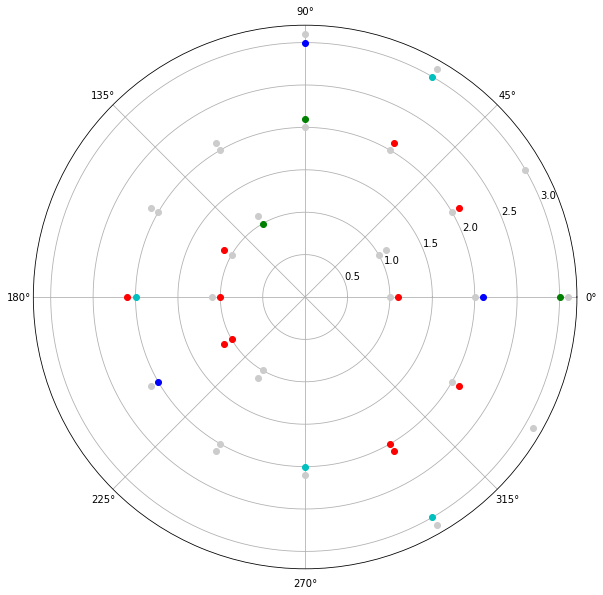

In [414]:
from sklearn.cluster import OPTICS
alg = OPTICS(max_eps=0.2, min_samples=3, metric='cosine')
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)

Большинство точек - это просто шум, с другим расстоянием тоже не очень:

There are 7 clusters


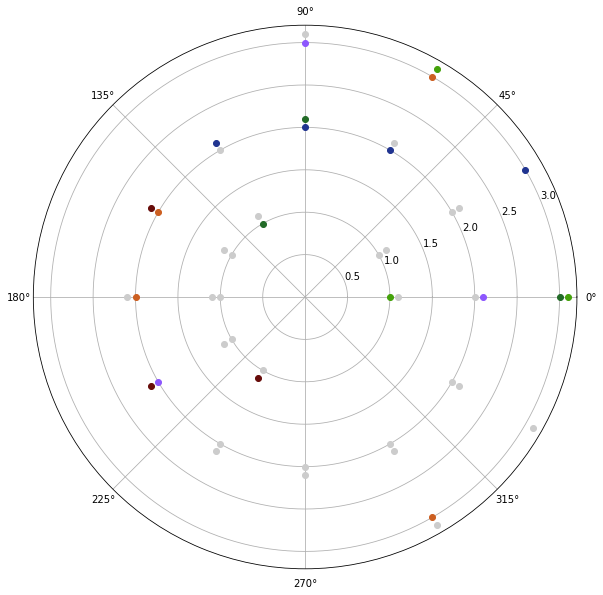

In [423]:
from sklearn.cluster import OPTICS
alg = OPTICS(max_eps=10000000, min_samples=3, metric='manhattan')
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)

С Kmeans как-то получше, даже кажется, что есть зависимость по месяцу (но скорее всего мне просто хочется её увидеть):

There are 3 clusters


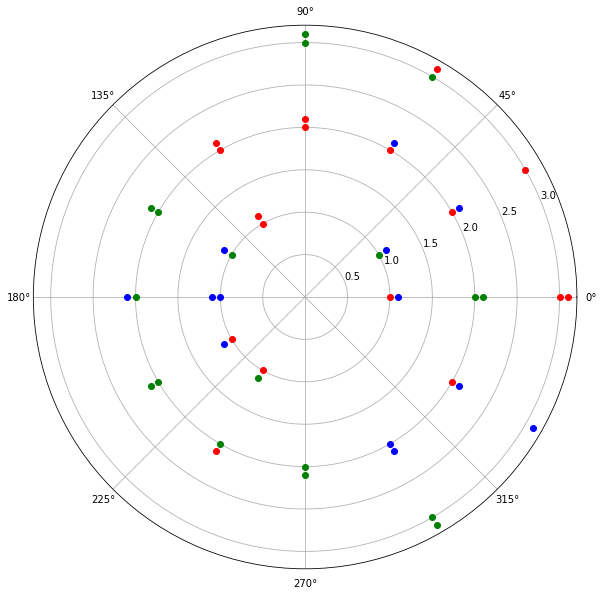

In [416]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=3)
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)

Интересно, что если отключить нормализацию, будет выделено фактически 2 кластера, один до сентября 2020, другой после:

There are 3 clusters


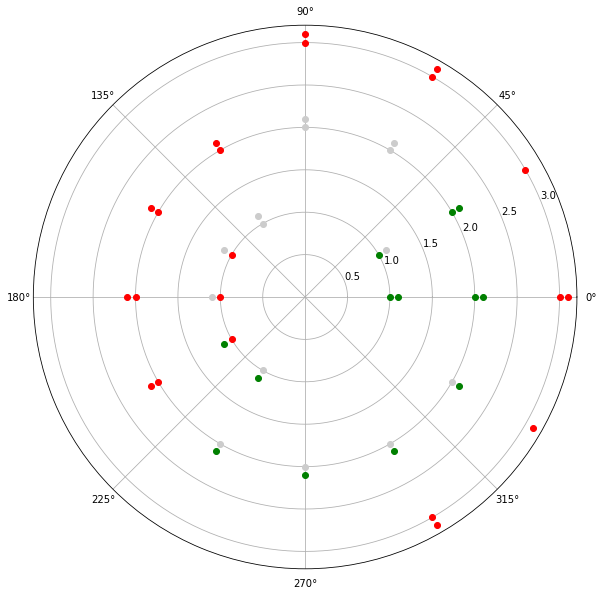

In [417]:
from sklearn.cluster import OPTICS
alg = OPTICS(max_eps=0.2, min_samples=4, metric='cosine')
clusters = calculate_clusters(data, alg, normalize=False)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)

There are 2 clusters


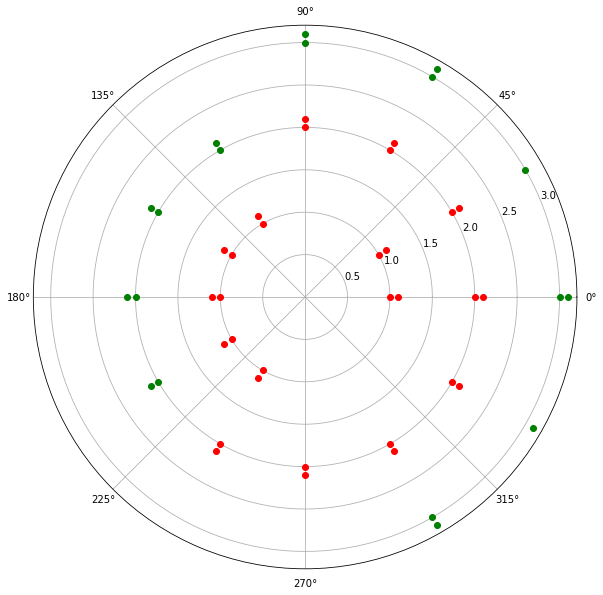

In [421]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=2)
clusters = calculate_clusters(data, alg, normalize=False)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)